In [1]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [2]:
import sys, os
sys.path.append('/content/drive/MyDrive/Colab Notebooks/CS5344 Big Data')
path_to_file = '/content/drive/MyDrive/Colab Notebooks/CS5344 Big Data/'
os.chdir(path_to_file)
!pwd

/content/drive/MyDrive/Colab Notebooks/CS5344 Big Data


In [3]:
import pandas as pd 
import numpy as np
from nltk.corpus import stopwords 
from collections import Counter
import string
import re
import seaborn as sns
import matplotlib.pyplot as plt
from torch.utils.data import TensorDataset, DataLoader
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [4]:
def preprocess_string(s):
    # Remove all non-word characters (everything except numbers and letters)
    s = re.sub(r"[^\w\s]", '', s)
    # Replace all runs of whitespaces with no space
    s = re.sub(r"\s+", '', s)
    # replace digits with no space
    s = re.sub(r"\d", '', s)
    return s

In [51]:
data = pd.read_csv('keyword_tweets_iPhone14ProMax_clean Outcome.csv', index_col=0)
data.dropna(subset=['Tweet_Clean'], inplace=True)

In [52]:
data.head()

,Time,Tweet,Tweet_Clean,prob,result
0,2022-10-16 01:50:41,Rattlesnake Point - Day trip from Toronto | Fall 2022 | iPhone 14 Pro Ma... https://t.co/s6jAII5Wwk via @YouTube #iPhone14Pro #iphone14promax #AutumnVibes #fall #fallcolors,rattlesnake point day trip toronto fall 2022 iphone 14 pro via,0.733175,1
2,2022-10-16 01:41:21,RT @GadgetsBoy: #iPhone14ProMax (left) vs #GooglePixel7Pro (right) - lowlight: Which is better? https://t.co/9LZpvPgWO4,left vs right lowlight better,0.688019,1
3,2022-10-16 01:28:43,iPhone 14 Pro Max 48 MP Camera 😍 #shotoniphone #iPhone14ProMax @Apple \n\nFull Res. Image 👇🏻 \n\nhttps://t.co/r6FsEP8Du2 https://t.co/fC8MViPgcH,iphone 14 pro max 48 mp camera full res image,0.371666,0
4,2022-10-16 01:25:27,RT @AR72014: #wallpapers #iOS16 \n\nMilky Way #wallpaper \n\nfor \n\n#iPhone14ProMax\n#iPhone14Pro\n#iPhone14Plus\n#iPhone14\n#iPhone13ProMax\n#iPhone…,milky way,0.717987,1
5,2022-10-16 01:21:53,sell/buy/repair iPhones best price SG @ https://t.co/TuXIilalNC\n\n#sgBuyBack #sgFoneFix #sgiPad #iPhone14 #iPhone14plus #iPhone14Pro #iPhone14ProMax #mobileio #cryptomobile #mobilemart #mobilefix #mobileDAO https://t.co/BIKlzniUIU,sell buy repair iphones best price sg,0.863689,1


In [53]:
data_neg = data[data.result == 0]
text_neg = " ".join(text for text in data_neg.Tweet_Clean)


In [54]:
text_neg[:100]

'iphone 14 pro max 48 mp camera full res image standard golden reviewer extreme hdr test people bash '

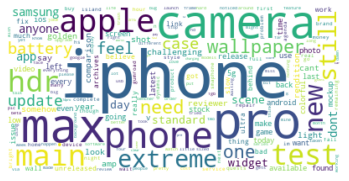

In [55]:
word_cloud_neg = WordCloud(collocations = False, background_color = 'white').generate(text_neg)
plt.imshow(word_cloud_neg, interpolation='bilinear')
plt.axis("off")
# plt.show()
plt.savefig("./wordclouds/iPhone_Negative_Sentiment_Word_Cloud.png", bbox_inches="tight")
# anything with camera?

In [56]:
neg_list = []
neg_list.append(preprocess_string(word) for word in text_neg.lower().split())

In [57]:
neg_list

[<generator object <genexpr> at 0x7fe69daef650>]

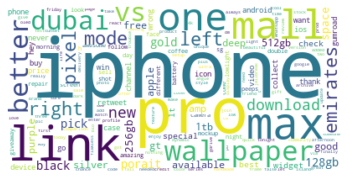

In [58]:
data_pos = data[data.result == 1]
text_pos = " ".join(str(text) for text in data_pos.Tweet_Clean)
word_cloud_pos = WordCloud(collocations = False, background_color = 'white').generate(text_pos)
plt.imshow(word_cloud_pos, interpolation='bilinear')
plt.axis("off")
# plt.show()
plt.savefig("./wordclouds/iPhone_Positive_Sentiment_Word_Cloud.png", bbox_inches="tight")

In [59]:
# Extreme sentiment
data["mytext_new"] = data['Tweet_Clean'].str.lower().str.replace('[^\w\s]','')


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  


In [60]:
data_pos = data[data.prob>0.75]
data_pos.count()

Time           1093
Tweet          1093
Tweet_Clean    1093
prob           1093
result         1093
mytext_new     1093
dtype: int64

In [61]:
data_neg = data[data.prob<0.5]
data_neg.count()

Time           489
Tweet          489
Tweet_Clean    489
prob           489
result         489
mytext_new     489
dtype: int64

In [62]:
new_pos = data_pos.mytext_new.str.split(expand=True).stack().value_counts().reset_index()
 
new_pos.columns = ['Word', 'Frequency'] 
 
new_pos.head(20)


,Word,Frequency
0,iphone,577
1,pro,429
2,14,376
3,max,206
4,download,177
5,new,173
6,link,158
7,gt,120
8,lt,115
9,wallpapers,111


In [63]:
new_neg = data_neg.mytext_new.str.split(expand=True).stack().value_counts().reset_index()
 
new_neg.columns = ['Word', 'Frequency'] 
 
new_neg.head(20)

,Word,Frequency
0,iphone,171
1,14,107
2,pro,94
3,max,83
4,camera,76
5,phone,65
6,apple,53
7,like,48
8,main,46
9,hdr,45


In [67]:
data[data['Tweet_Clean'].str.contains("camera")].sort_values(by = 'prob').head(20)

,Time,Tweet,Tweet_Clean,prob,result,mytext_new
3809,2022-10-08 04:02:03,"I cannot even more AGREE!!!!!! @Apple can you get our MONEY BACK 🤬🤬🤬 There was no point, just like iPhone 12 🙄 the camera is literally the same as the 13 😅😂🤣 raise your hand if you got scammed 🍏 #iPhone14ProMax #iphone14promaxsucks https://t.co/NipRzhKLpZ",cannot even agree get money back point like iphone 12 camera literally 13 raise hand got scammed,0.086228,0,cannot even agree get money back point like iphone 12 camera literally 13 raise hand got scammed
1552,2022-10-12 22:36:47,Trying my new phone’s camera on my Lucyboo 👻 #iphone14promax https://t.co/BJ8xCQgzuL,trying new phone camera lucyboo,0.129572,0,trying new phone camera lucyboo
1843,2022-10-12 03:25:09,"RT @amitbhawani: Apple releases #iOS1603 1GB sized update for the latest iPhone models. \n\nMain Fix - In some cases, the Camera app was slow…",apple releases 1gb sized update latest iphone models main fix cases camera app slow,0.134347,0,apple releases 1gb sized update latest iphone models main fix cases camera app slow
1681,2022-10-12 13:20:22,"RT @amitbhawani: Apple releases #iOS1603 1GB sized update for the latest iPhone models. \n\nMain Fix - In some cases, the Camera app was slow…",apple releases 1gb sized update latest iphone models main fix cases camera app slow,0.140947,0,apple releases 1gb sized update latest iphone models main fix cases camera app slow
1570,2022-10-12 21:10:48,"So this new iOS update was supposed to fix the camera issue, and it’s still here…#iPhone14Pro #iPhone14ProMax",new ios update supposed fix camera issue still,0.141606,0,new ios update supposed fix camera issue still
1834,2022-10-12 04:04:17,"RT @amitbhawani: Apple releases #iOS1603 1GB sized update for the latest iPhone models. \n\nMain Fix - In some cases, the Camera app was slow…",apple releases 1gb sized update latest iphone models main fix cases camera app slow,0.144790,0,apple releases 1gb sized update latest iphone models main fix cases camera app slow
1839,2022-10-12 03:44:41,"RT @amitbhawani: Apple releases #iOS1603 1GB sized update for the latest iPhone models. \n\nMain Fix - In some cases, the Camera app was slow…",apple releases 1gb sized update latest iphone models main fix cases camera app slow,0.145078,0,apple releases 1gb sized update latest iphone models main fix cases camera app slow
1837,2022-10-12 03:59:23,"RT @amitbhawani: Apple releases #iOS1603 1GB sized update for the latest iPhone models. \n\nMain Fix - In some cases, the Camera app was slow…",apple releases 1gb sized update latest iphone models main fix cases camera app slow,0.147719,0,apple releases 1gb sized update latest iphone models main fix cases camera app slow
1802,2022-10-12 05:41:05,"RT @amitbhawani: Apple releases #iOS1603 1GB sized update for the latest iPhone models. \n\nMain Fix - In some cases, the Camera app was slow…",apple releases 1gb sized update latest iphone models main fix cases camera app slow,0.149721,0,apple releases 1gb sized update latest iphone models main fix cases camera app slow
4049,2022-10-07 16:58:17,"#iPhone14ProMax produces the worst output outdoors , bad color science &amp; over sharpening \n\nDull 👎👎👎👎 \n\nWhere as Samsung camera is still a winner for me 🤞🔥🍁✅ in next tweet \n\n1/2 https://t.co/5IPOgil0qD",produces worst output outdoors bad color science amp sharpening dull samsung camera still winner next tweet 1 2,0.151372,0,produces worst output outdoors bad color science amp sharpening dull samsung camera still winner next tweet 1 2


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


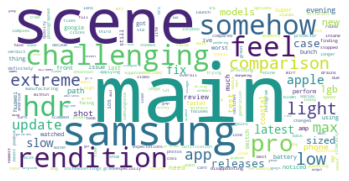

In [69]:
data_neg = data[data.result == 0][data['Tweet_Clean'].str.contains("camera")]
text_neg = " ".join(text for text in data_neg.Tweet_Clean)
text_neg = re.sub("(camera|iphone)", "", text_neg)
word_cloud_neg = WordCloud(collocations = False, background_color = 'white').generate(text_neg)
plt.imshow(word_cloud_neg, interpolation='bilinear')
plt.axis("off")
plt.show()
# plt.savefig("./wordclouds/iPhone_Negative_Sentiment_Word_Cloud.png", bbox_inches="tight")

In [ ]:
data.Time

0        2022-10-16 12:43:16
1        2022-10-16 12:42:29
2        2022-10-16 12:42:06
3        2022-10-16 12:40:55
4        2022-10-16 12:40:45
                ...         
69936    2022-10-07 22:51:27
69937    2022-10-07 22:51:01
69938    2022-10-07 22:50:29
69939    2022-10-07 22:50:14
69940    2022-10-07 22:45:41
Name: Time, Length: 69941, dtype: object

In [26]:
data['Date'] = pd.to_datetime(data['Time']).dt.date

In [27]:
data.head()

,Time,Tweet,Tweet_Clean,prob,result,mytext_new,Date
0,2022-10-16 01:50:41,Rattlesnake Point - Day trip from Toronto | Fa...,rattlesnake point day trip toronto fall 2022 i...,0.733175,1,rattlesnake point day trip toronto fall 2022 i...,2022-10-16
1,2022-10-16 01:44:22,RT @jianoliu: #wallpapers #homescreen\n#iPhone...,NaN,0.589638,1,NaN,2022-10-16
2,2022-10-16 01:41:21,RT @GadgetsBoy: #iPhone14ProMax (left) vs #Goo...,left vs right lowlight better,0.688019,1,left vs right lowlight better,2022-10-16
3,2022-10-16 01:28:43,iPhone 14 Pro Max 48 MP Camera 😍 #shotoniphone...,iphone 14 pro max 48 mp camera full res image,0.371666,0,iphone 14 pro max 48 mp camera full res image,2022-10-16
4,2022-10-16 01:25:27,RT @AR72014: #wallpapers #iOS16 \n\nMilky Way ...,milky way,0.717987,1,milky way,2022-10-16


In [28]:
df_grouped_sentiment = (data.groupby(['Date', 'Date'])['result'].value_counts().unstack().reset_index(level=0, drop=True))
df_grouped_sentiment['rate'] = df_grouped_sentiment[0]/(df_grouped_sentiment[0]+df_grouped_sentiment[1])

In [29]:
df_grouped_sentiment

result,0,1,rate
Date,,,
2022-10-07,28,235,0.106464
2022-10-08,69,455,0.131679
2022-10-09,52,489,0.096118
2022-10-10,53,496,0.096539
2022-10-11,53,318,0.142857
2022-10-12,47,282,0.142857
2022-10-13,40,368,0.098039
2022-10-14,67,649,0.093575
2022-10-15,76,324,0.190000


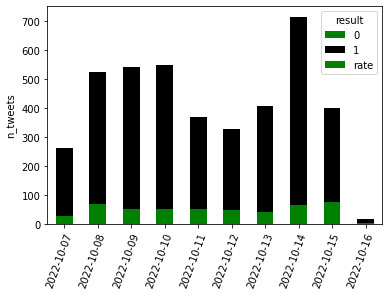

In [30]:

ax = df_grouped_sentiment.plot.bar(stacked=True, color=['green', 'black'])
ax.set_xticklabels(labels=df_grouped_sentiment.index, rotation=70, rotation_mode="anchor", ha="right")
ax.set_xlabel('')
ax.set_ylabel('n_tweets');

# Monday, 10 October
# October 2022 missile strikes on Ukraine

In [ ]:
import datetime
df_ten = data.loc[data['Date']== datetime.date(2022, 10, 10)]

In [31]:
data.describe()

,prob,result
count,4117.000000,4117.000000
mean,0.642089,0.881224
std,0.164334,0.323564
min,0.010748,0.000000
25%,0.574066,1.000000
50%,0.615462,1.000000
75%,0.764801,1.000000
max,0.991009,1.000000


In [36]:
def result2(value):
    if value >0.75:
        return 1
    elif value >0.6:
        return 0.5
    else:
        return 0

data['result2'] = data['prob'].map(result2)

In [37]:
data.result2.value_counts()

0.0    1793
0.5    1231
1.0    1093
Name: result2, dtype: int64

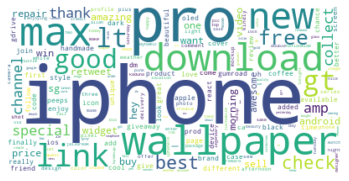

In [38]:
data_pos = data[data.result2 == 1]
text_pos = " ".join(str(text) for text in data_pos.Tweet_Clean)
word_cloud_pos = WordCloud(collocations = False, background_color = 'white').generate(text_pos)
plt.imshow(word_cloud_pos, interpolation='bilinear')
plt.axis("off")
plt.show()

In [39]:
pd.set_option('display.max_colwidth', None)

In [40]:
data.sort_values(by = 'prob', ascending=False)

,Time,Tweet,Tweet_Clean,prob,result,mytext_new,Date,result2
1044,2022-10-14 04:06:11,Thank you @enjoyGLOBE for the super awesome unboxing event! Thank you @talk2GLOBE for always answering my queries! Lol \n\n#iPhone14ProMax #iPhone14 #iPhone14Pro #iPhone14Plus #IncredibleTogether #TheMidnightLaunch #XyloatthePalace https://t.co/ln1WYGE7hN,thank super awesome unboxing event thank always answering queries lol,0.991009,1,thank super awesome unboxing event thank always answering queries lol,2022-10-14,1.0
1572,2022-10-12 20:59:05,afternoon setup... no jailbreak... #iPhone14ProMax #Wall credits to the designer #AE @FAlhmma thank you #Widget @Dr_iPh0ne thank you #Icon #V1NT4GE @XaBdOooX thank you #ShowLive #Mockup @SeanKly thank you...🔥🔥🔥🔥🔥 @tombowie @matuspalma @UtdAll https://t.co/58Q0iAaBX9,afternoon setup jailbreak credits designer thank thank thank thank,0.987862,1,afternoon setup jailbreak credits designer thank thank thank thank,2022-10-12,1.0
1244,2022-10-13 17:43:29,"Hey peeps..check out this really awesome widget,very well made and designed..with gorgeous transparent appearance! 👌🏼 Agenda ++ \n\n#Widgy #iPhone14ProMax \n\nhttps://t.co/kDyrvdbmwo",hey peeps check really awesome widget well made designed gorgeous transparent appearance agenda,0.987214,1,hey peeps check really awesome widget well made designed gorgeous transparent appearance agenda,2022-10-13,1.0
62,2022-10-15 20:33:06,RT @RossArt83: Hey peeps..here one free code \n\nEnjoy 😉 \n\n#Widgy #iPhone14ProMax https://t.co/WyRscKENVR,hey peeps one free code enjoy,0.983528,1,hey peeps one free code enjoy,2022-10-15,1.0
4105,2022-10-07 14:31:43,RT @twelvesouth: Thank you @appleinsider for naming #BookBook as one of the best #iPhone14 and #iPhone14ProMax cases! Shop at #TwelveSouth…,thank naming one best cases shop,0.982577,1,thank naming one best cases shop,2022-10-07,1.0
...,...,...,...,...,...,...,...,...
2987,2022-10-09 16:22:48,RT @AngeDeusRex: -I’m seriously going back to my iPhone 11 Pro Max. This signal/connectivity issue with the #iPhone14ProMax is terrible! Ev…,seriously going back iphone 11 pro max signal connectivity issue terrible ev,0.031139,0,seriously going back iphone 11 pro max signal connectivity issue terrible ev,2022-10-09,0.0
3982,2022-10-07 18:47:41,"I was moving a table and my phone fell from it and landed on this concrete pavement. It fell on its side, then landed on its back. This sleek case took the beating and protected the lens. #happenedsofast #notascratch #iPhone14ProMax https://t.co/1vL06GuPGI",moving table phone fell landed concrete pavement fell side landed back sleek case took beating protected lens,0.030033,0,moving table phone fell landed concrete pavement fell side landed back sleek case took beating protected lens,2022-10-07,0.0
1937,2022-10-11 18:30:20,"I tried googling for answers on how to keep AOD on all the time since its called ALWAYS ON DISPLAY but cant find answers, or its just my iphone 14 pro max? 🤷‍♂️ #iPhone14Pro #iphone14promax #Apple @AppleSupport @Apple https://t.co/I0ICyKflYC",tried googling answers keep aod time since called always display cant find answers iphone 14 pro max,0.017619,0,tried googling answers keep aod time since called always display cant find answers iphone 14 pro max,2022-10-11,0.0
3389,2022-10-08 19:49:05,Has anybody upgraded their phone with @ThreeUK to the iPhone 14 pro / iPhone 14 pro max and had issues with them taking ages to deliver recently?\n\nMines due 26th October but seen loads of bad reviews and now I’m worried #threeuk #iPhone14Pro #iPhone14ProMax,anybody upgraded phone iphone 14 pro iphone 14 pro max issues taking ages deliver recently mines due 26th october seen loads bad reviews worried,0.011236,0,anybody upgraded phone iphone 14 pro iphone 14 pro max issues taking ages deliver recently mines due 26th october seen loads bad reviews worried,2022-10-08,0.0


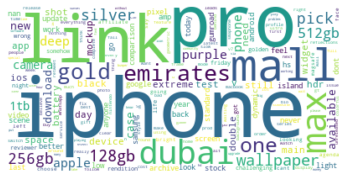

In [41]:
data_neg = data[data.result2 == 0]
text_neg = " ".join(str(text) for text in data_neg.Tweet_Clean)
word_cloud_neg = WordCloud(collocations = False, background_color = 'white').generate(text_neg)
plt.imshow(word_cloud_neg, interpolation='bilinear')
plt.axis("off")
plt.show()

In [42]:
df_grouped_sentiment2 = (data[data.result2!=0.5].groupby(['Date', 'Date'])['result2'].value_counts().unstack().reset_index(level=0, drop=True))
df_grouped_sentiment2

result2,0.0,1.0
Date,,
2022-10-07,120,94
2022-10-08,240,173
2022-10-09,250,156
2022-10-10,261,150
2022-10-11,187,107
2022-10-12,155,92
2022-10-13,179,103
2022-10-14,232,116
2022-10-15,161,101


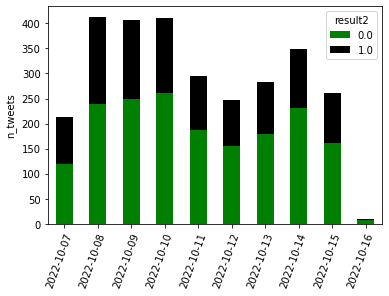

In [43]:
ax = df_grouped_sentiment2.plot.bar(stacked=True, color=['green', 'black'])
ax.set_xticklabels(labels=df_grouped_sentiment2.index, rotation=70, rotation_mode="anchor", ha="right")
ax.set_xlabel('')
ax.set_ylabel('n_tweets');

In [44]:
df_grouped_sentiment2['rate'] = df_grouped_sentiment2[0]/(df_grouped_sentiment2[0]+df_grouped_sentiment2[1])
df_grouped_sentiment2

result2,0.0,1.0,rate
Date,,,
2022-10-07,120,94,0.560748
2022-10-08,240,173,0.581114
2022-10-09,250,156,0.615764
2022-10-10,261,150,0.635036
2022-10-11,187,107,0.636054
2022-10-12,155,92,0.627530
2022-10-13,179,103,0.634752
2022-10-14,232,116,0.666667
2022-10-15,161,101,0.614504
